In [15]:
# Import modules:
import gmsh
import sys
import numpy as np

In [16]:
# Simple 2d geometry:
#          D----C
#         /     |
#  F-----E      |
#  |            |
#  A------------B
h = 10
x_down = 15
x_slope = 10
x_up = 15
y_down = 10
y_slope = 10

In [17]:
# Initialize gmsh:
gmsh.initialize()

# Points:
A = gmsh.model.geo.add_point(x=0, y=0, z=0, meshSize=h)
B = gmsh.model.geo.add_point(x=x_down+x_slope+x_up, y=0, z=0, meshSize=h)
C = gmsh.model.geo.add_point(x=x_down+x_slope+x_up, y=y_down+y_slope, z=0, meshSize=h)
D = gmsh.model.geo.add_point(x=x_down+x_slope, y=y_down+y_slope, z=0, meshSize=h/2)
E = gmsh.model.geo.add_point(x=x_down, y=y_down, z=0, meshSize=h/2)
F = gmsh.model.geo.add_point(x=0, y=y_down, z=0, meshSize=h)

# Line segments:
AB = gmsh.model.geo.add_line(A, B)
BC = gmsh.model.geo.add_line(B, C)
CD = gmsh.model.geo.add_line(C, D)
DE = gmsh.model.geo.add_line(D, E)
EF = gmsh.model.geo.add_line(E, F)
FA = gmsh.model.geo.add_line(F, A)

# Closed curves:
boundary = gmsh.model.geo.add_curve_loop([AB, BC, CD, DE, EF, FA])

# Surfaces inside closed curves:
gmsh.model.geo.add_plane_surface([boundary])

# Synchronize and generate mesh:
gmsh.model.geo.synchronize()
gmsh.model.mesh.generate()

# Write mesh data to file:
# gmsh.write("GFG.msh")

# Create graphical user interface
# if 'close' not in sys.argv:
#     gmsh.fltk.run()

# Get node coordinates:
nodeTags, nodeCoords, nodeParams = gmsh.model.mesh.getNodes()
# Get mesh elements:
elemTypes, elemTags, elemNodeTags = gmsh.model.mesh.getElements(dim=2)

# Finalize the Gmsh API
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 40%] Meshing curve 3 (Line)
Info    : [ 60%] Meshing curve 4 (Line)
Info    : [ 70%] Meshing curve 5 (Line)
Info    : [ 90%] Meshing curve 6 (Line)
Info    : Done meshing 1D (Wall 0.00173322s, CPU 0.002268s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00123457s, CPU 0.001315s)
Info    : Meshing 3D...
Info    : Done meshing 3D (Wall 8.905e-06s, CPU 9e-06s)
Info    : 26 nodes 56 elements


In [18]:
# Extract X- and Y- coordinates of all nodes from GMSH outputs:
node = np.array(nodeCoords)
node_X = node[0:-1:3]
node_Y = node[1:-1:3]
print("X coords:")
print(node_X)
print("Y coords:")
print(node_Y)


X coords:
[ 0.         40.         40.         25.         15.          0.
 10.         20.         30.         40.         33.81101695 28.89881611
 21.66666667 18.33333333 11.10118389  6.18898305 23.10670503 32.94371268
 25.97047276 28.16435309 19.08106601 13.97122223  8.9034851   4.15524924
 25.24981329 33.80510925]
Y coords:
[ 0.          0.         20.         20.         10.         10.
  0.          0.          0.         10.         20.         20.
 16.66666667 13.33333333 10.         10.         11.64311705 14.65975111
 15.6961939  10.56987456  7.70923276  5.67337     6.2106841   5.30968638
  5.15254069  6.19489075]


In [19]:
# All (triangular) elements:
elem = elemNodeTags[0].reshape(-1,3)
elem = elem-1 # indexing from 0
print(elem)

[[17 19 25]
 [ 5  0 23]
 [ 7 20 21]
 [20  4 21]
 [ 9 17 25]
 [ 6  7 21]
 [11  3 18]
 [17 11 18]
 [16 20 24]
 [ 3 12 18]
 [13  4 20]
 [19 16 24]
 [17 18 19]
 [10 11 17]
 [ 0  6 23]
 [19 24 25]
 [20  7 24]
 [15  5 23]
 [ 6 22 23]
 [12 13 16]
 [ 7  8 24]
 [ 8  1 25]
 [ 1  9 25]
 [14 15 22]
 [12 16 18]
 [18 16 19]
 [ 4 14 21]
 [ 6 21 22]
 [16 13 20]
 [24  8 25]
 [22 15 23]
 [21 14 22]
 [ 9  2 17]
 [ 2 10 17]]


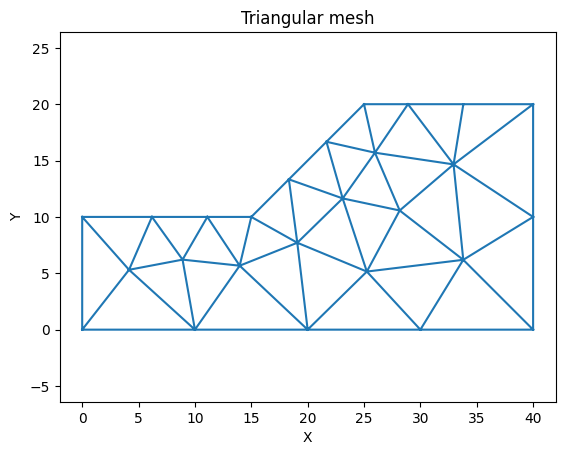

In [20]:
# Plot outside GMSH (only using node_X, node_Y, elem):
import mesh_tools

mesh = mesh_tools.Mesh2d(node_X, node_Y, elem)
mesh.plot_mesh()

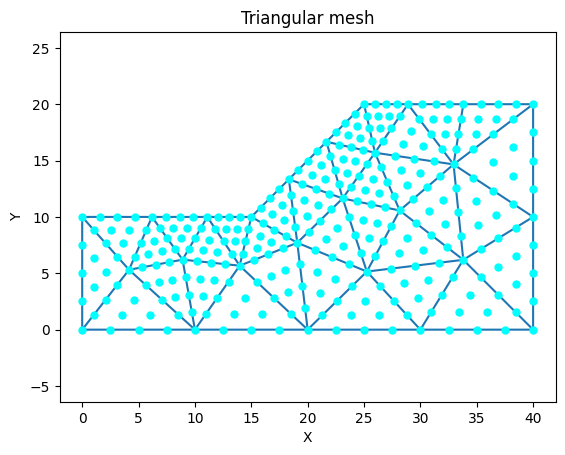

In [21]:
# Add nodes for PN elements outside GMSH
# TODO: Can be done inside GMSH?
# TODO: Requirements on nodes ordering?
mesh.P1_to_PN(N=4)

mesh.plot_mesh()
mesh.plot_nodes()